# Toronto Population Forecasting 

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Read / Clean the data

In [49]:
data = pd.read_csv('Toronto_Population.csv')
data.columns = data.columns.str.strip()

data['Date'] = pd.to_datetime(data['Date'])
reference_date = datetime(1950, 1, 1)
data['Days_since_reference'] = (data['Date'] - reference_date).dt.days


data.head(5)

,Date,Population,Annual Change,Days_since_reference
0,1950-12-31,1068000,0.00,364
1,1951-12-31,1122000,5.06,729
2,1952-12-31,1178000,4.99,1095
3,1953-12-31,1238000,5.09,1460
4,1954-12-31,1300000,5.01,1825


## Plot the Data to find Trend

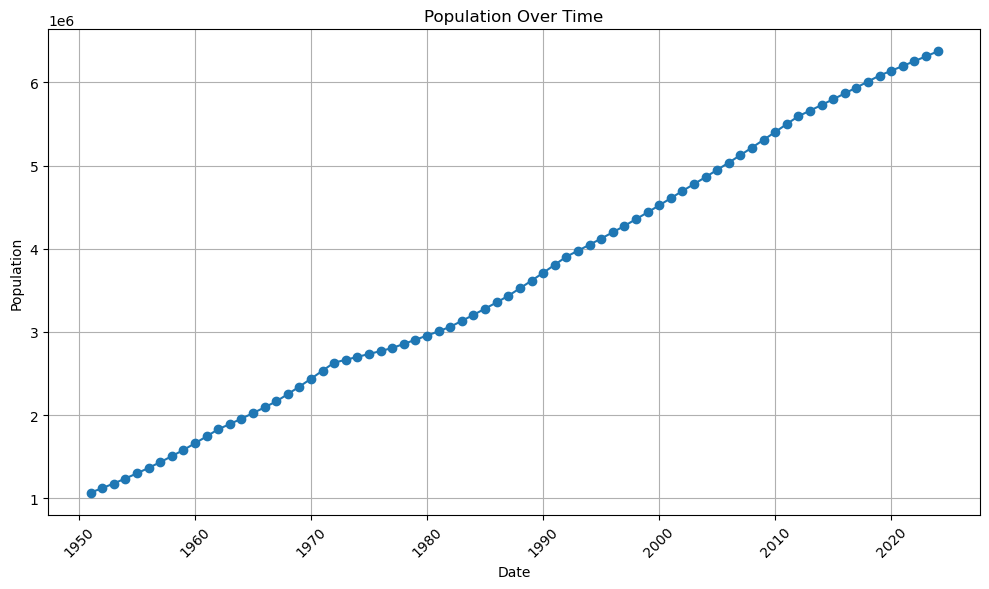

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Population'], marker='o', linestyle='-')
plt.title('Population Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Split the data into Train and Test 

In [51]:
from sklearn.model_selection import train_test_split

X = data[['Days_since_reference']]
y = data['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 56)


## Fit and Train the Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

## Cofficient and Intercept of Model

In [53]:
print(lm.intercept_)
print(lm.coef_)

866510.9733354831
[202.43266613]


## Plotting Linear Regression Model and Population Graph

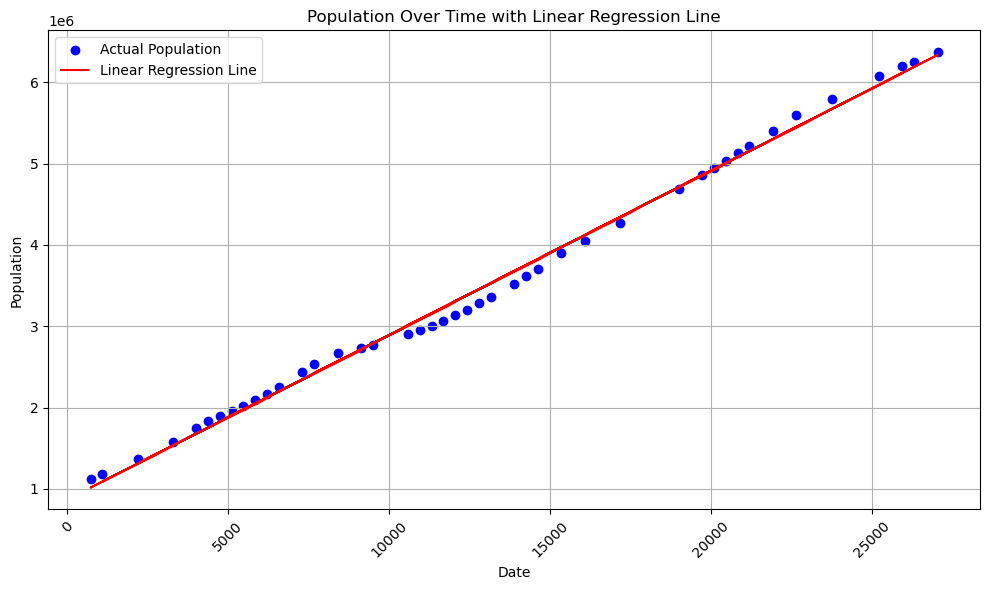

In [54]:

# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Population')
plt.plot(X_train, predictions_train, color='red', label='Linear Regression Line')
plt.title('Population Over Time with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
from sklearn import metrics
mape_test = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print("MAE:", metrics.mean_absolute_error(y_test, predictions_test))
print("MSE:", metrics.mean_squared_error(y_test, predictions_test))

print("MAPE for testing set:", mape_test) # 2.73% deviate from the actual dataset

MAE: 81961.1149489486
MSE: 8076803623.169686
MAPE for testing set: 2.728501798794323


## Predictions for the years

In [56]:

start_date = datetime(2024, 3, 29)
end_date = datetime(2025, 3, 27)

predicted_populations = []

current_date = start_date
while current_date <= end_date:
    days_since_reference = (current_date - reference_date).days
    current_date_numeric = np.array([[days_since_reference]])
    
    predicted_population = lm.predict(current_date_numeric)
    
    predicted_populations.append(predicted_population[0])
    
    current_date += timedelta(days=1)


## Predicted Populations VS Date dataframe

In [57]:
actual_dates = [start_date + timedelta(days=i) for i in range(len(predicted_populations))]

df_predicted_population = pd.DataFrame({
    'Date': actual_dates,
    'Predicted Population': predicted_populations
})

df_predicted_population.head()

,Date,Predicted Population
0,2024-03-29,6.355675e+06
1,2024-03-30,6.355878e+06
2,2024-03-31,6.356080e+06
3,2024-04-01,6.356282e+06
4,2024-04-02,6.356485e+06


## Extract Specific Date Population

In [58]:
desired_date = datetime(2025, 3, 27)

predicted_population = df_predicted_population.loc[df_predicted_population['Date'] == desired_date, 'Predicted Population'].values[0]

rounded_predicted_population = round(predicted_population)

print("Predicted Population for", desired_date, ":", rounded_predicted_population)

Predicted Population for 2025-03-27 00:00:00 : 6429158


## Population by Age Group

In [59]:
age_group = pd.read_csv('Toronto_Population_ByAgeGroup.csv')


print(age_group)

   Age groups  Gender  Population counts
0      0 to 4  Women+             141265
1      0 to 4    Men+             148155
2      5 to 9  Women+             158665
3      5 to 9    Men+             167010
4    10 to 14  Women+             169830
5    10 to 14    Men+             180125
6    15 to 19  Women+             172865
7    15 to 19    Men+             184295
8    20 to 24  Women+             201225
9    20 to 24    Men+             217205
10   25 to 29  Women+             229840
11   25 to 29    Men+             236690
12   30 to 34  Women+             236265
13   30 to 34    Men+             230895
14   35 to 39  Women+             229195
15   35 to 39    Men+             214750
16   40 to 44  Women+             219375
17   40 to 44    Men+             195575
18   45 to 49  Women+             219040
19   45 to 49    Men+             195950
20   50 to 54  Women+             225125
21   50 to 54    Men+             206050
22   55 to 59  Women+             224465
23   55 to 59   

In [60]:
custom_order = ['0 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39',
                '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79',
                '80 to 84', '85 to 89', '90 to 94', '95 to 99', '100+']

total_population_by_age_group = age_group.groupby('Age groups', sort=False)['Population counts'].sum().reindex(custom_order).reset_index()

print(total_population_by_age_group)

   Age groups  Population counts
0      0 to 4             289420
1      5 to 9             325675
2    10 to 14             349955
3    15 to 19             357160
4    20 to 24             418430
5    25 to 29             466530
6    30 to 34             467160
7    35 to 39             443945
8    40 to 44             414950
9    45 to 49             414990
10   50 to 54             431175
11   55 to 59             438470
12   60 to 64             381720
13   65 to 69             308525
14   70 to 74             258975
15   75 to 79             175000
16   80 to 84             126985
17   85 to 89              80915
18   90 to 94              39855
19   95 to 99              10895
20       100+               1490


In [61]:
total_population = total_population_by_age_group['Population counts'].sum()


total_population_by_age_group['Percentage'] = (total_population_by_age_group['Population counts'] / total_population) * 100

print(total_population_by_age_group)

   Age groups  Population counts  Percentage
0      0 to 4             289420    4.666394
1      5 to 9             325675    5.250942
2    10 to 14             349955    5.642415
3    15 to 19             357160    5.758583
4    20 to 24             418430    6.746455
5    25 to 29             466530    7.521984
6    30 to 34             467160    7.532142
7    35 to 39             443945    7.157840
8    40 to 44             414950    6.690346
9    45 to 49             414990    6.690991
10   50 to 54             431175    6.951946
11   55 to 59             438470    7.069565
12   60 to 64             381720    6.154570
13   65 to 69             308525    4.974429
14   70 to 74             258975    4.175521
15   75 to 79             175000    2.821570
16   80 to 84             126985    2.047412
17   85 to 89              80915    1.304614
18   90 to 94              39855    0.642592
19   95 to 99              10895    0.175663
20       100+               1490    0.024024


In [62]:
forecasted_total_population_2025 = 6429159

# Calculate the forecasted population for each age group in 2025
forecasted_population_2025 = (total_population_by_age_group['Percentage'] / 100) * forecasted_total_population_2025

# Create a new DataFrame with the forecasted population for each age group in 2025
forecasted_population_df = pd.DataFrame({
    'Age groups': total_population_by_age_group['Age groups'],
    'Forecasted Population 2025': forecasted_population_2025.astype(int)  # Convert to integers
})

forecasted_population_df.rename(columns={'Age groups': 'Age Group'}, inplace=True)

print(forecasted_population_df)

   Age Group  Forecasted Population 2025
0     0 to 4                      300009
1     5 to 9                      337591
2   10 to 14                      362759
3   15 to 19                      370228
4   20 to 24                      433740
5   25 to 29                      483600
6   30 to 34                      484253
7   35 to 39                      460188
8   40 to 44                      430133
9   45 to 49                      430174
10  50 to 54                      446951
11  55 to 59                      454513
12  60 to 64                      395687
13  65 to 69                      319813
14  70 to 74                      268450
15  75 to 79                      181403
16  80 to 84                      131631
17  85 to 89                       83875
18  90 to 94                       41313
19  95 to 99                       11293
20      100+                        1544


In [63]:
age_group_merge_mapping = {
    '15 to 19': '15 to 29',
    '20 to 24': '15 to 29',
    '25 to 29': '15 to 29',
    '30 to 34': '30 to 39',
    '35 to 39': '30 to 39',
    '40 to 44': '40 to 49',
    '45 to 49': '40 to 49',
    '50 to 54': '50 to 59',
    '55 to 59': '50 to 59',
    '60 to 64': '60 to 69',
    '65 to 69': '60 to 69',
    '70 to 74': '70 to 79',
    '75 to 79': '70 to 79',
    '80 to 84': '80+',
    '85 to 89': '80+',
    '90 to 94': '80+',
    '95 to 99': '80+',
    '100+': '80+'
}

# Map age groups from forecasted_population_df to new age groups
forecasted_population_df['Age Group'] = forecasted_population_df['Age Group'].map(age_group_merge_mapping).fillna(forecasted_population_df['Age Group'])

# Merge with combined age groups
merged_df = forecasted_population_df.groupby('Age Group', as_index=False)['Forecasted Population 2025'].sum()

merged_df['Age Group'] = merged_df['Age Group'].str.replace(' to ', '-')
merged_df['Age Group'] = merged_df['Age Group'].str.strip()

print(merged_df)

  Age Group  Forecasted Population 2025
0       0-4                      300009
1     10-14                      362759
2     15-29                     1287568
3     30-39                      944441
4     40-49                      860307
5       5-9                      337591
6     50-59                      901464
7     60-69                      715500
8     70-79                      449853
9       80+                      269656


In [64]:
coverage = pd.read_csv('VaccineCoverage_ON_Feb2024.csv')
print(coverage)

   Age Group  Culmulative % of People Vaccinated
0        0-4                                 7.8
1        0-4                                 7.8
2       5-11                                43.5
3       5-11                                43.4
4      12-17                                77.7
5      12-17                                76.0
6      18-29                                82.5
7      18-29                                77.7
8      30-39                                86.4
9      30-39                                82.4
10     40-49                                90.4
11     40-49                                87.8
12     50-59                                91.5
13     50-59                                90.8
14     60-69                                95.3
15     60-69                                94.1
16     70-79                                96.5
17     70-79                                96.4
18       80+                                95.4
19       80+        

In [65]:
average_coverage_by_age_group = coverage.groupby('Age Group')['Culmulative % of People Vaccinated'].mean().reset_index()
average_coverage_by_age_group['Culmulative % of People Vaccinated'] /=100
average_coverage_by_age_group['Age Group'] = average_coverage_by_age_group['Age Group'].str.strip()


print(average_coverage_by_age_group)

  Age Group  Culmulative % of People Vaccinated
0       0-4                              0.0780
1     12-17                              0.7685
2     18-29                              0.8010
3     30-39                              0.8440
4     40-49                              0.8910
5      5-11                              0.4345
6     50-59                              0.9115
7     60-69                              0.9470
8     70-79                              0.9645
9       80+                              0.9675


In [66]:
age_group_mapping = {
    '0-4': '0-4',
    '10-14': '12-17',
    '15-29': '18-29',
    '30-39': '30-39',
    '40-49': '40-49',
    '5-9': '5-11',
    '50-59': '50-59',
    '60-69': '60-69', 
    '70-79': '70-79',
    '80+': '80+'
}

In [67]:
# Map age groups from merged_df to new age groups
merged_df['Age Group'] = merged_df['Age Group'].map(age_group_mapping).fillna(merged_df['Age Group'])

# Merge with average_coverage_by_age_group
merged_data = pd.merge(merged_df, average_coverage_by_age_group, on='Age Group')

print(merged_data)


  Age Group  Forecasted Population 2025  Culmulative % of People Vaccinated
0       0-4                      300009                              0.0780
1     12-17                      362759                              0.7685
2     18-29                     1287568                              0.8010
3     30-39                      944441                              0.8440
4     40-49                      860307                              0.8910
5      5-11                      337591                              0.4345
6     50-59                      901464                              0.9115
7     60-69                      715500                              0.9470
8     70-79                      449853                              0.9645
9       80+                      269656                              0.9675


In [68]:
merged_data['Forecasted Vaccination'] = merged_data['Forecasted Population 2025'] * merged_data['Culmulative % of People Vaccinated']
merged_data['Forecasted Vaccination'] = merged_data['Forecasted Vaccination'].round().astype(int)
print(merged_data)


  Age Group  Forecasted Population 2025  Culmulative % of People Vaccinated  \
0       0-4                      300009                              0.0780   
1     12-17                      362759                              0.7685   
2     18-29                     1287568                              0.8010   
3     30-39                      944441                              0.8440   
4     40-49                      860307                              0.8910   
5      5-11                      337591                              0.4345   
6     50-59                      901464                              0.9115   
7     60-69                      715500                              0.9470   
8     70-79                      449853                              0.9645   
9       80+                      269656                              0.9675   

   Forecasted Vaccination  
0                   23401  
1                  278780  
2                 1031342  
3                 

In [69]:
total_forecasted_population = merged_data['Forecasted Population 2025'].sum()
print(total_forecasted_population)

merged_data['% of population vaccinated'] = (merged_data['Forecasted Vaccination'] /total_forecasted_population)*100

print(merged_data)

6429148
  Age Group  Forecasted Population 2025  Culmulative % of People Vaccinated  \
0       0-4                      300009                              0.0780   
1     12-17                      362759                              0.7685   
2     18-29                     1287568                              0.8010   
3     30-39                      944441                              0.8440   
4     40-49                      860307                              0.8910   
5      5-11                      337591                              0.4345   
6     50-59                      901464                              0.9115   
7     60-69                      715500                              0.9470   
8     70-79                      449853                              0.9645   
9       80+                      269656                              0.9675   

   Forecasted Vaccination  % of population vaccinated  
0                   23401                    0.363983  
1         